#  **Exploratory Data Analysis**

In short “EDA”, is an approach to analyze data in order to:
- summarize main characteristics of the data - gain better understanding of the dataset,
- uncover relationships between different variables, and
- extract important variables for the problem we are trying to solve.
The main question we are trying to answer in this module is:
“What are the characteristics that have the most impact on the car price?”
We will be going through a couple of different useful exploratory data analysis techniques
in order to answer this question.


In order to do that, we will use **Descriptive Statistics**.

## **Descriptive Statistics**

When you begin to analyze data, it’s important to first explore your data before you spend
time building complicated models. One easy way to do so is to calculate some
descriptive statistics for your data. Descriptive statistical analysis helps to describe basic features of a dataset and obtains a short summary about the sample and measures
of the data.

Some basic approaches here will be:

- Mean, median and mode
- Analyses of variation (ANOVA)
- Normal distribuition
- Grouping
- Correlation

Let’s show you a couple different useful
methods.



## Environment settings

In [ ]:
#Settings for the next examples
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


#Loading datasets 
path = '/content/drive/My Drive/Colab Notebooks/Data/'
df_purchase = pd.read_csv(path + 'df_purchases_profile.csv')
df_drinks = pd.read_csv(path + 'drinks.csv')

In [ ]:
df_purchase.head()

,annual spend,age,distance_to_store_Km,onsite,online,age_binned,annual spend binned
0,1000,20,20,1,50,Young,high
1,1200,13,10,2,20,Young,high
2,150,35,100,5,30,Middle-age,low
3,400,60,3,20,1,Elderly,medium
4,80,40,5,5,4,Middle-age,low


In [ ]:
df_drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,continent
0,Afghanistan,0,0,0,0.0,34660000,Asia
1,Albania,89,132,54,4.9,2876000,Europe
2,Algeria,25,0,14,0.7,40061000,Africa
3,Andorra,245,138,312,12.4,77281000,Europe
4,Angola,217,57,45,5.9,28081000,Africa


## Useful methods

### **info()**

Print a concise summary of a DataFrame.

This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [ ]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   annual spend          9 non-null      int64 
 1   age                   9 non-null      int64 
 2   distance_to_store_Km  9 non-null      int64 
 3   onsite                9 non-null      int64 
 4   online                9 non-null      int64 
 5   age_binned            9 non-null      object
 6   annual spend binned   9 non-null      object
dtypes: int64(5), object(2)
memory usage: 632.0+ bytes


In [ ]:
df_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   population                    193 non-null    int64  
 6   continent                     193 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 10.7+ KB


### **describe()**


Shows basic statistics for all numerical variables. It shows the mean, the total number of data points, the standard deviation, the quartiles and the extreme values. Any NaN values are automatically skipped in these statistics. This function will give you a clearer idea
of the distribution of your different variables.

Explaining

As you can see below , the attribute 'annual spend' has 9 rows , the mean between non nulls is 538, the standard deviation (std) is 416,  the minimum value is 80, the maximum value is 1200. The quartile 25% covers until the value 150, which means that the lowest 25% numbers are between the minimum and 150, as the lowest 50% numbers are between the minimum and 450, and so on.

See the same metrics to the other attributes. 

In [ ]:
df_purchase.describe()

,annual spend,age,distance_to_store_Km,onsite,online
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,538.888889,34.222222,19.111111,6.222222,15.777778
std,416.036190,19.337643,31.923520,6.722681,16.791201
min,80.000000,13.000000,1.000000,1.000000,1.000000
25%,150.000000,18.000000,2.000000,2.000000,4.000000
50%,450.000000,35.000000,5.000000,5.000000,5.000000
75%,950.000000,42.000000,20.000000,5.000000,25.000000
max,1200.000000,65.000000,100.000000,20.000000,50.000000


In [ ]:
df_drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population
count,193.000000,193.000000,193.000000,193.000000,1.930000e+02
mean,106.160622,80.994819,49.450777,4.717098,3.849083e+07
std,101.143103,88.284312,79.697598,3.773298,1.396570e+08
min,0.000000,0.000000,0.000000,0.000000,1.190000e+03
25%,20.000000,4.000000,1.000000,1.300000,1.978300e+06
50%,76.000000,56.000000,8.000000,4.200000,8.412000e+06
75%,188.000000,128.000000,59.000000,7.200000,2.803790e+07
max,376.000000,438.000000,370.000000,14.400000,1.372470e+09


If you use the parameter include='object', it is suitable to show categorical values

In [ ]:
df_purchase.describe(include='object')

,age_binned,annual spend binned
count,9,9
unique,3,3
top,Young,low
freq,4,3


In [ ]:
df_drinks.describe(include='object')

,country,continent
count,193,193
unique,193,6
top,Colombia,Africa
freq,1,53


### **mean()**

Maybe do you think that the method describe() also provide the mean, but if you want the mean along nmerical columns, that is the way (Use axis=1). 

**it makes more sense for df_drinks

In [ ]:
df_purchase.mean(axis=1)

0    218.2
1    249.0
2     64.0
3     96.8
4     26.8
5    112.6
6    104.2
7     29.0
8    205.0
dtype: float64

In [ ]:
df_drinks.mean(axis=1)

0       6932000.00
1        575255.98
2       8012207.94
3      15456341.48
4       5616264.98
          ...     
188     6124169.54
189    18689623.20
190     5411601.22
191     3094792.50
192     2612265.94
Length: 193, dtype: float64

### **median()**

The median is equals to 50% in describe function

In [ ]:
df_purchase.median()

annual spend            450.0
age                      35.0
distance_to_store_Km      5.0
onsite                    5.0
online                    5.0
dtype: float64

In [ ]:
df_drinks.median()

beer_servings                        76.0
spirit_servings                      56.0
wine_servings                         8.0
total_litres_of_pure_alcohol          4.2
population                      8412000.0
dtype: float64

### **var()**

Provides the variance

In [ ]:
df_purchase.var()

annual spend            173086.111111
age                        373.944444
distance_to_store_Km      1019.111111
onsite                      45.194444
online                     281.944444
dtype: float64

In [ ]:
df_drinks.var()

beer_servings                   1.022993e+04
spirit_servings                 7.794120e+03
wine_servings                   6.351707e+03
total_litres_of_pure_alcohol    1.423778e+01
population                      1.950407e+16
dtype: float64

### **std()**

Other ways to get standard deviation (besides property std in describe)

In [ ]:
sqrt(df_drinks['beer_servings'].var())

101.14310253931335

In [ ]:
df_drinks['beer_servings'].std()

101.14310253931335

###  **value_counts()**

Useful to summarize attributes categoricals

In [ ]:
df_purchase['age_binned'].value_counts()

Young         4
Middle-age    3
Elderly       2
Name: age_binned, dtype: int64

In [ ]:
df_purchase['annual spend binned'].value_counts() 

low       3
high      3
medium    3
Name: annual spend binned, dtype: int64

In [ ]:
df_drinks['country'].value_counts()

Colombia        1
San Marino      1
Micronesia      1
El Salvador     1
Mozambique      1
               ..
Namibia         1
Turkmenistan    1
Israel          1
Monaco          1
Montenegro      1
Name: country, Length: 193, dtype: int64

In [ ]:
df_drinks['continent'].value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

### **unique() / nunique()**

The first show us what are the unique labels while the second show us numerically how much unique labels the attribute has. 

**We will see more useful examples in notebook about grouping .

In [ ]:
df_purchase['age_binned'].unique()

array(['Young', 'Middle-age', 'Elderly'], dtype=object)

In [ ]:
df_purchase['age_binned'].nunique()

3

As you can see, the dataset 'df_drinks' has 6 continents that repeat itself, but the attribute 'country' has no repetition.

In [ ]:
df_drinks['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [ ]:
df_drinks['continent'].nunique()

6

In [ ]:
df_drinks['country'].nunique()

193

###  **corr()**

In [ ]:
df_purchase['distance_to_store_Km'].corr(df_purchase['online'])

0.530101907356479

In [ ]:
df_drinks['total_litres_of_pure_alcohol'].corr(df_drinks['beer_servings'])

0.8358386279352704

## Representing graphically

### **Pie graph**: 

If it is a categorical attribute (as long as it does not have a large number of labels) it can be represented in percentage using pie charts

See below a graph about counting 'annual spend binned'

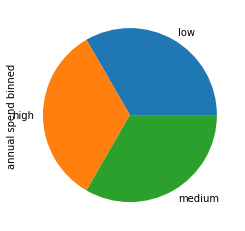

In [ ]:
df_purchase['annual spend binned'].value_counts().plot(kind='pie')

See below a graph about counting 'age_binned'

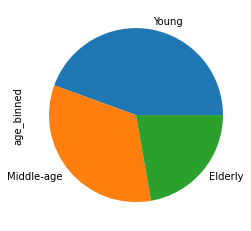

In [ ]:
df_purchase['age_binned'].value_counts().plot(kind='pie')

It gets easy to understand the distribution

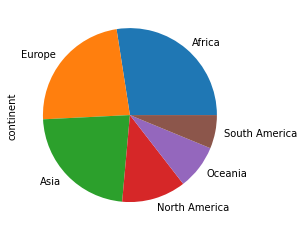

In [ ]:
df_drinks['continent'].value_counts().plot(kind='pie')

### **Boxplots**:  

Boxplots are a great way to visualize numeric
data, since you can visualize the various distributions of the data.
The main features that the boxplot shows are the median of the data, which represents where
the middle datapoint is. The Upper Quartile shows where the 75th percentile
is, the Lower Quartile shows where the 25th percentile is. The data between the Upper
and Lower Quartile represents the Interquartile Range.
Next, you have the Lower and Upper Extremes. These are calculated as 1.5 times the interquartile
range above the 75th percentile, and as 1.5 times the IQR below the 25th percentile.
Finally, boxplots also display outliers as individual dots that occur outside the upper
and lower extremes. With boxplots, you can easily spot outliers
and also see the distribution and skewness of the data.
Boxplots make it easy to compare between groups. 


**The main utility of boxplot is identify outliares, points outside the lower limit and upper limit**


 In this example, using Boxplot we can see the distribution of different categories of 'age_binned'

Bellow the relation between 'age_binned' and 'annual spend' tell us that the young is the profile who spended more money in the last year.


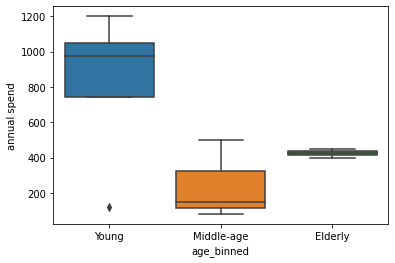

In [ ]:
sns.boxplot(x="age_binned", y="annual spend", data=df_purchase)

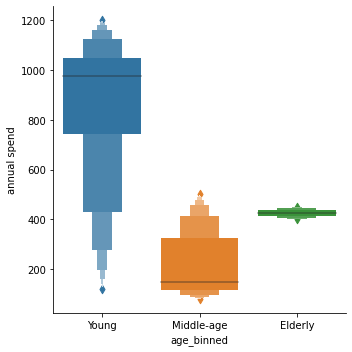

In [ ]:
sns.catplot(x="age_binned", y="annual spend", kind='boxen', data=df_purchase)

Seing the relation between 'annual spend binned' and 'online' we can conlude that the profile that had the higher spend used to buy online

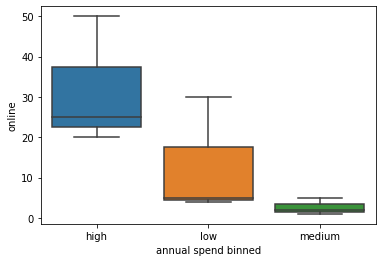

In [ ]:
sns.boxplot(x="annual spend binned", y="online", data=df_purchase)

Which confirm that young people buy the most online and they are who that spend more money in that store. 

Where will you invest more money in marketing the next year if you were the boss? 

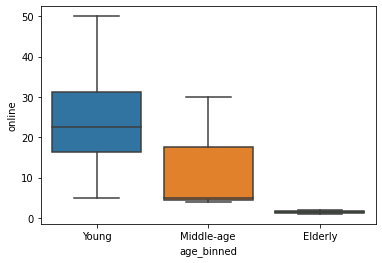

In [ ]:
sns.boxplot(x="age_binned", y="online", data=df_purchase)

In [ ]:
df_drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,continent
0,Afghanistan,0,0,0,0.0,34660000,Asia
1,Albania,89,132,54,4.9,2876000,Europe
2,Algeria,25,0,14,0.7,40061000,Africa
3,Andorra,245,138,312,12.4,77281000,Europe
4,Angola,217,57,45,5.9,28081000,Africa


As you can see that is a huge difference between continents and consume of wine and beer 

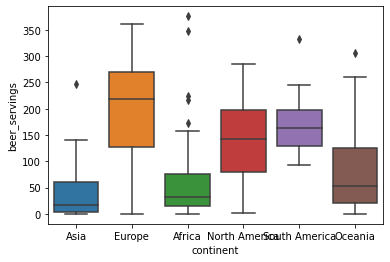

In [ ]:
sns.boxplot(x="continent", y="beer_servings", data=df_drinks)

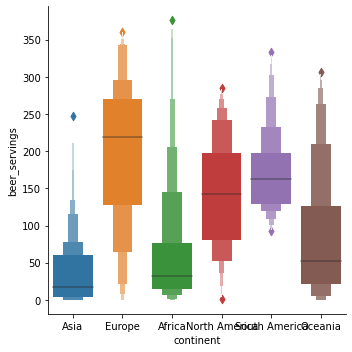

In [ ]:
sns.catplot(x="continent", y="beer_servings", kind='boxen', data=df_drinks)

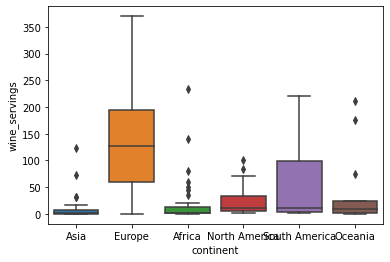

In [ ]:
sns.boxplot(x="continent", y="wine_servings", data=df_drinks)

### **Scatter plot**: 

It is a kind of graph that help us to understand also the correlation between two variables.

Do you think there is a correlation between how far a person lives from the store and how much they buy online?

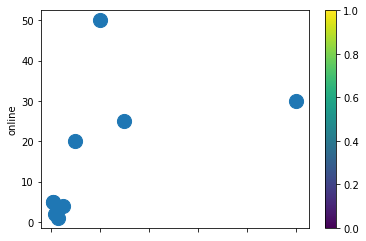

In [ ]:
df_purchase.plot.scatter(x='distance_to_store_Km', y='online', s=200, colormap='viridis')
plt.show()

What about the correlation between annual spend and age? See below.

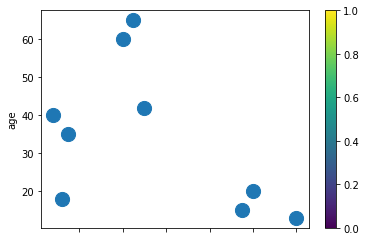

In [ ]:
df_purchase.plot.scatter(x='annual spend', y='age', s=200, colormap='viridis')
plt.show()

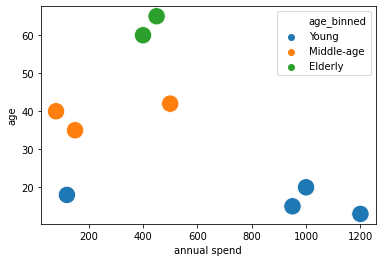

In [ ]:
sns.scatterplot(x="annual spend", y="age", hue="age_binned",  data=df_purchase, s=300)

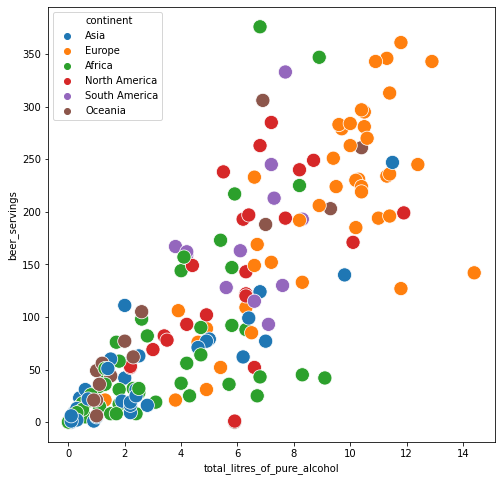

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_drinks['total_litres_of_pure_alcohol'], y=df_drinks['beer_servings'], 
                hue="continent",  data=df_drinks, s=200)

### **Histogram**

It give us a notion of distribution of attributes

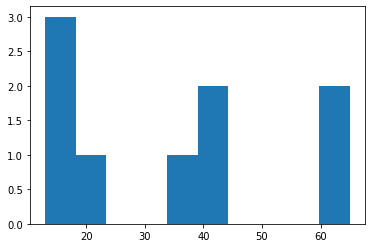

In [ ]:
plt.hist(df_purchase['age'])
plt.show()

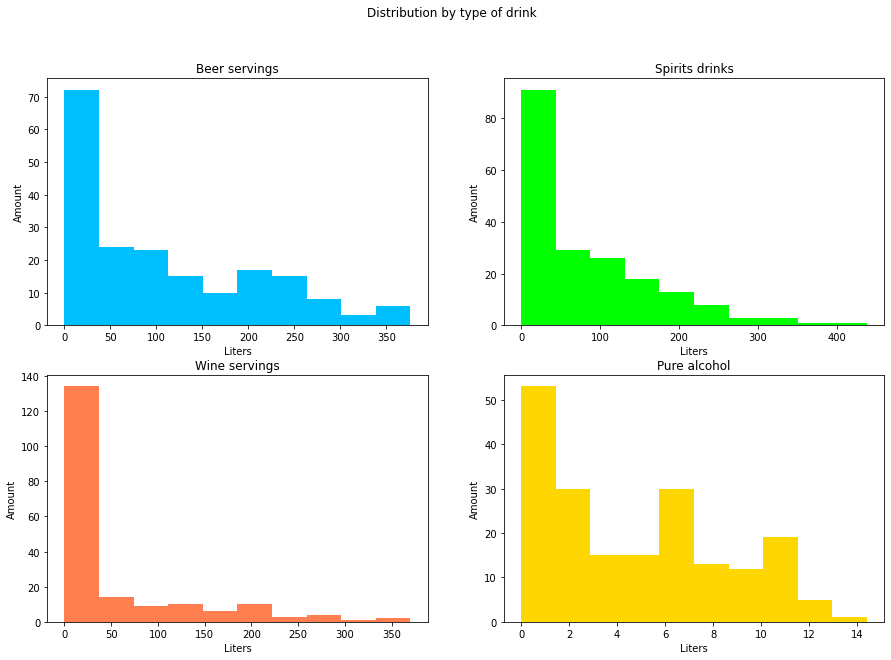

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("Distribution by type of drink")

# Dados para cada subplot
ax1.hist(df_drinks['beer_servings'], color='#00BFFF')
ax2.hist(df_drinks['spirit_servings'], color='#00FF00')
ax3.hist(df_drinks['wine_servings'], color='#FF7F50')
ax4.hist(df_drinks['total_litres_of_pure_alcohol'], color='#FFD700')

ax1.set(title="Beer servings", xlabel="Liters", ylabel="Amount")
ax2.set(title="Spirits drinks", xlabel="Liters", ylabel="Amount")
ax3.set(title="Wine servings", xlabel="Liters", ylabel="Amount")
ax4.set(title="Pure alcohol", xlabel="Liters", ylabel="Amount")

plt.show()

### Distplot

Flexibly plot a univariate distribution of observations.

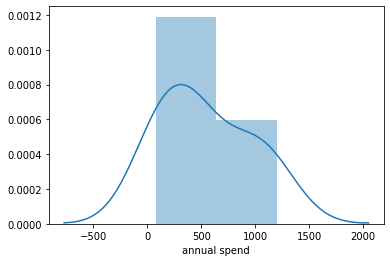

In [ ]:
sns.distplot(df_purchase['annual spend'])         
plt.show()

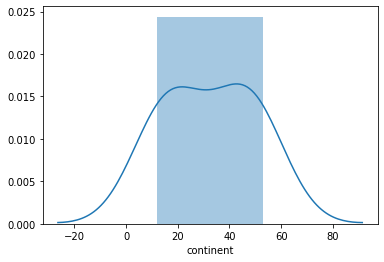

In [ ]:
sns.distplot(df_drinks['continent'].value_counts())         
plt.show()

### Bar graph

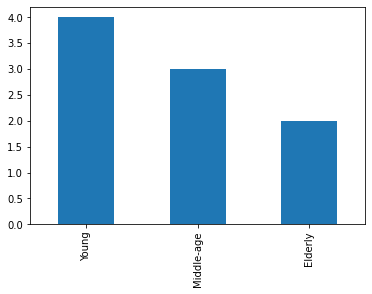

In [ ]:
plt.figure()
df_purchase['age_binned'].value_counts().plot.bar()
plt.show()

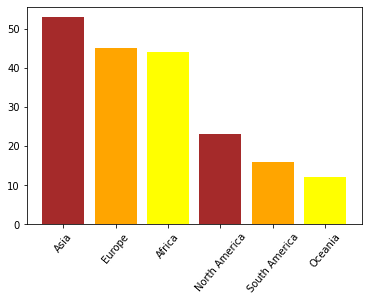

In [ ]:
plt.figure()
plt.bar(df_drinks['continent'].unique(), df_drinks['continent'].value_counts(), color=['brown', 'orange', 'yellow'])
plt.xticks(rotation=50)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


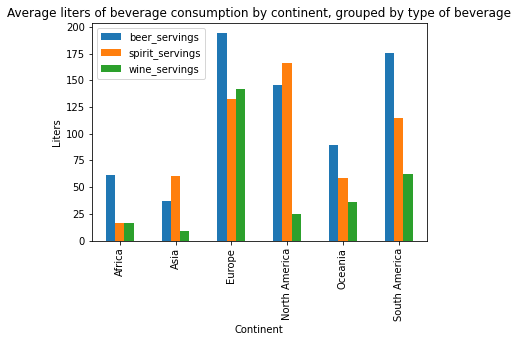

In [ ]:
df_drinks.groupby('continent')['beer_servings','spirit_servings','wine_servings'].mean().plot.bar(
    title='Average liters of beverage consumption by continent, grouped by type of beverage')
plt.xlabel('Continent')
plt.ylabel('Liters')
plt.show()